# Analyse de Données - Maintenance Prédictive dans l'Industrie Chimique


Ce notebook présente une analyse complète du jeu de données généré pour la maintenance prédictive dans l'industrie chimique. Les étapes incluent :

1. Chargement des données.
2. Exploration des données.
3. Visualisation des tendances et des anomalies.
4. Analyse avancée, incluant la corrélation et la distribution des variables.
5. Détection et visualisation des anomalies.

## Configuration Initiale
Importation des bibliothèques nécessaires et configuration de l'environnement.


In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Charger les données
file_path = 'Chemical_Plant_Maintenance_Predictive_Data.csv'
data = pd.read_csv(file_path)

# Convertir les timestamps en format datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Aperçu des données
data.head()


,Timestamp,Temperature_Top,Temperature_Bottom,Pressure_Gas,Impurity_Rate,Vibration_Level,Maintenance_History
0,2024-01-01 00:00:00,304.967142,331.941295,143.092255,0.011007,0.444793,0
1,2024-01-01 01:00:00,298.617357,353.378850,141.941415,0.008087,0.615247,0
2,2024-01-01 02:00:00,306.476885,359.440410,160.304133,0.004738,0.441958,0
3,2024-01-01 03:00:00,315.230299,345.513964,147.354877,0.010770,0.424782,0
4,2024-01-01 04:00:00,297.658466,360.189407,149.071316,0.016037,0.602668,0


## Exploration des Données

In [2]:

# Statistiques descriptives
data.describe()

# Vérification des types de données et des valeurs manquantes
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Timestamp            8784 non-null   datetime64[ns]
 1   Temperature_Top      8784 non-null   float64       
 2   Temperature_Bottom   8784 non-null   float64       
 3   Pressure_Gas         8784 non-null   float64       
 4   Impurity_Rate        8784 non-null   float64       
 5   Vibration_Level      8784 non-null   float64       
 6   Maintenance_History  8784 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 480.5 KB


## Visualisation des Tendances

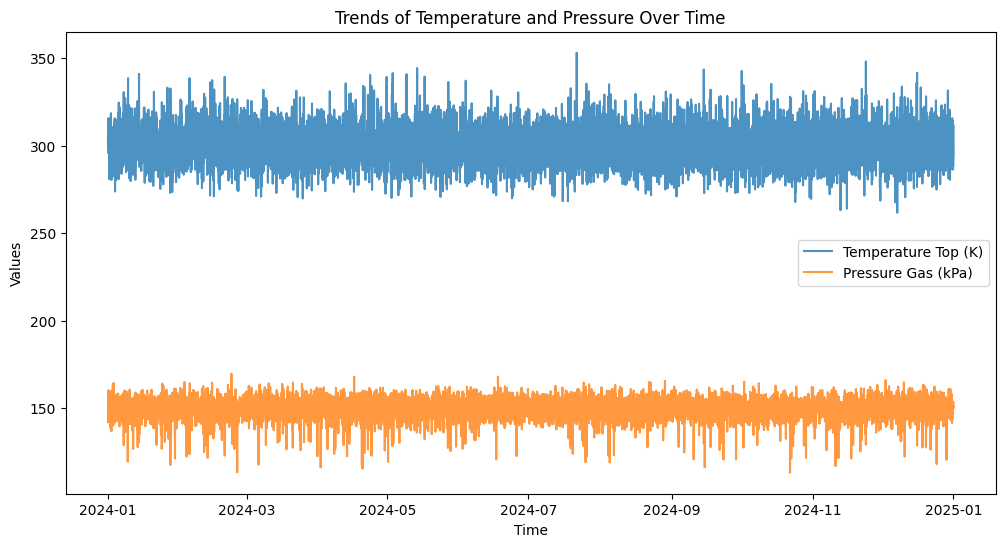

In [3]:

# Tendances des paramètres clés
plt.figure(figsize=(12, 6))
plt.plot(data['Timestamp'], data['Temperature_Top'], label='Temperature Top (K)', alpha=0.8)
plt.plot(data['Timestamp'], data['Pressure_Gas'], label='Pressure Gas (kPa)', alpha=0.8)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Trends of Temperature and Pressure Over Time')
plt.show()


## Distribution des Variables

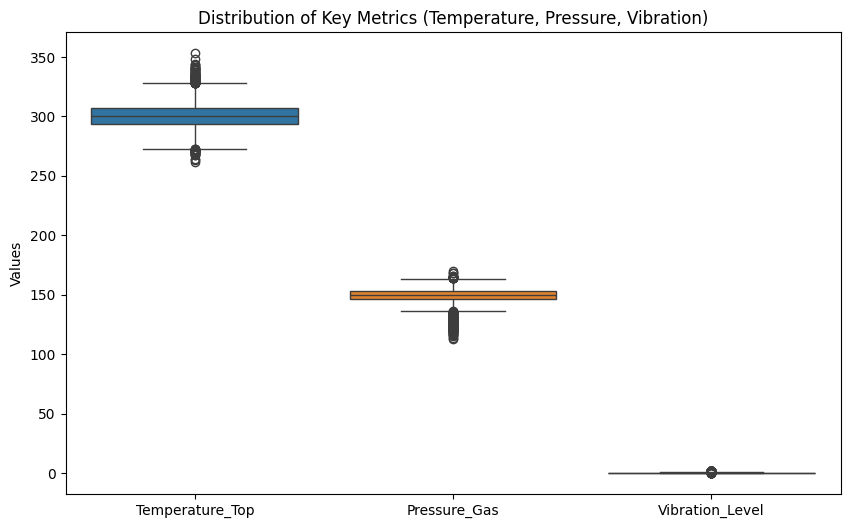

In [4]:

# Visualisation des distributions
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['Temperature_Top', 'Pressure_Gas', 'Vibration_Level']])
plt.title('Distribution of Key Metrics (Temperature, Pressure, Vibration)')
plt.ylabel('Values')
plt.show()


## Matrice de Corrélation

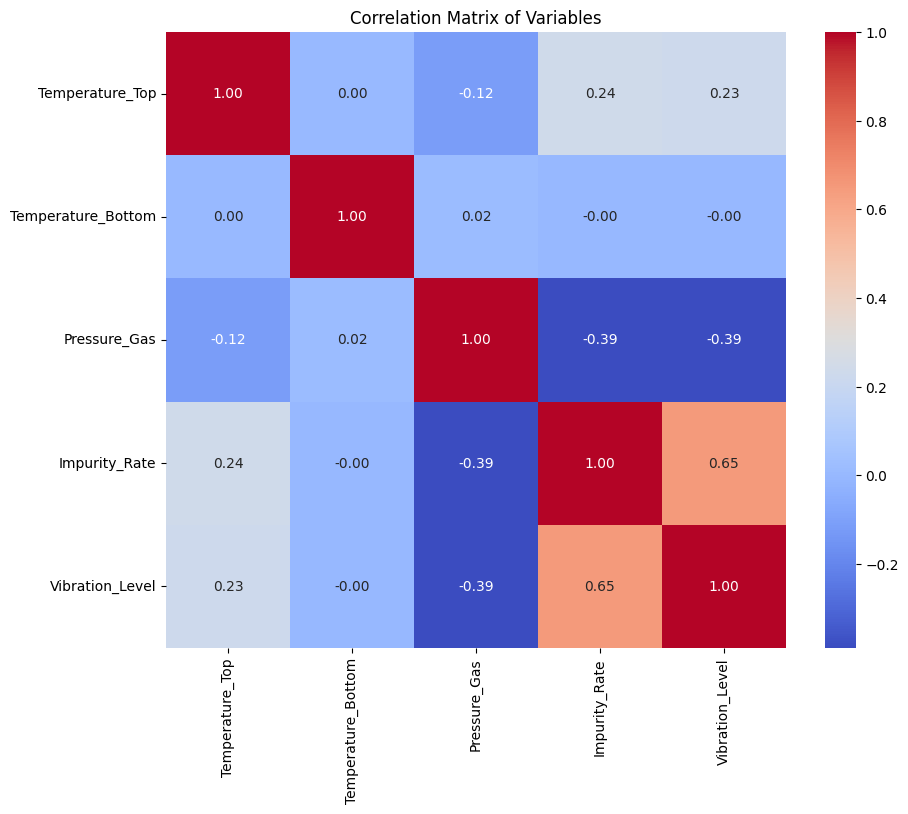

In [5]:

# Calcul de la matrice de corrélation
correlation_matrix = data[['Temperature_Top', 'Temperature_Bottom', 'Pressure_Gas', 'Impurity_Rate', 'Vibration_Level']].corr()

# Heatmap de la corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Variables')
plt.show()


## Détection des Anomalies

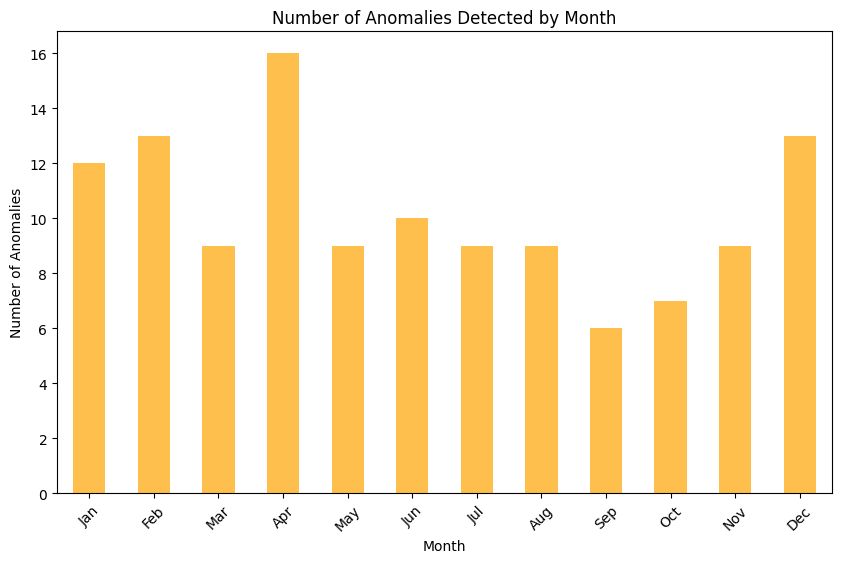

In [7]:

# Détection simple basée sur des seuils
anomalies = data[
    (data['Temperature_Top'] > 330) | 
    (data['Pressure_Gas'] < 120) | 
    (data['Vibration_Level'] > 1.5)
]

# Visualisation des anomalies par mois
data['Month'] = data['Timestamp'].dt.month
anomalies_by_month = anomalies.groupby('Month').size()

plt.figure(figsize=(10, 6))
anomalies_by_month.plot(kind='bar', color='orange', alpha=0.7)
plt.title('Number of Anomalies Detected by Month')
plt.xlabel('Month')
plt.ylabel('Number of Anomalies')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()
